# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### 5. Train the Agent with DDPG
Run the code cell below to train the agent from scratch. You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance! Alternatively, you can skip to the next step below (6. Watch a Smart Agent!), to load the saved model weights from a pre-trained agent. 

Episode 100	Average Score: 0.00	Max Average Score: 0.00
Episode 200	Average Score: 0.00	Max Average Score: 0.00
Episode 300	Average Score: 0.00	Max Average Score: 0.00
Episode 400	Average Score: 0.00	Max Average Score: 0.00
Episode 500	Average Score: 0.01	Max Average Score: 0.00
Episode 600	Average Score: 0.01	Max Average Score: 0.01
Episode 700	Average Score: 0.01	Max Average Score: 0.01
Episode 800	Average Score: 0.01	Max Average Score: 0.01
Episode 900	Average Score: 0.01	Max Average Score: 0.01
Episode 1000	Average Score: 0.04	Max Average Score: 0.01
Episode 1100	Average Score: 0.09	Max Average Score: 0.04
Episode 1200	Average Score: 0.14	Max Average Score: 0.09
Episode 1300	Average Score: 0.16	Max Average Score: 0.14
Episode 1371	Average Score: 0.50
Environment solved in 1371 episodes!	Average Score: 0.50
Episode 1400	Average Score: 0.75	Max Average Score: 0.16
Episode 1500	Average Score: 1.55	Max Average Score: 0.75
Episode 1600	Average Score: 1.22	Max Average Score: 1.55
Episode

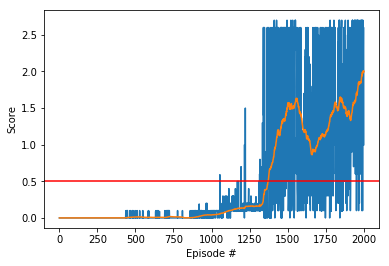

In [6]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent
%matplotlib inline


def ddpg(n_episodes=2000, max_t=1000, print_every=100):
    """Deep Deterministic Policy Gradients Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing/saving the state of the learning
    """    
    scores_list = []                           # list containing scores from each episode
    scores_window = deque(maxlen=print_every)  
    mean_scores = []                           # mean scores
    solved=False                                
    max_score=0.0                              

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # enable training
        states = env_info.vector_observations              # state
        scores = np.zeros(num_agents)                      # scores 
        agent.reset()                                      # reset the agent 
        for t in range(max_t):
            actions = agent.act(states)                    # agent actions 
            env_info = env.step(actions)[brain_name]       # actions to the environment
            next_states = env_info.vector_observations     # next set of states
            rewards = env_info.rewards                     # rewards
            done = env_info.local_done                     
            agent.step(states,actions,rewards,next_states,done)
            states = next_states
            scores += rewards                                # add the rewards
            if np.any(done):
                break
        score=np.max(scores)                   # maximum score between two players 
        scores_window.append(score)            # most recent score for averaging
        scores_list.append(score)              # save most recent score
        mean_score = np.mean(scores_window)    # calculate the mean score for the current window
        mean_scores.append(mean_score)         # save that mean score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_score), end="")
        # Save the learning state every 'print_every' episodes
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tMax Average Score: {:.2f}'.format(i_episode, np.mean(scores_window),max_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            # if a new maximum average score had been reached => save it and the network state
            if(max_score<mean_score):
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_max.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_max.pth')
                max_score=mean_score
        # If the desired score is achieved, save the learning state
        if mean_score>=0.5 and not(solved):
            solved=True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_done.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_done.pth')
    return scores_list,mean_scores


# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents = num_agents, random_seed=42)

# train
scores_list,mean_scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), scores_list)
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Watch a Smart Agent!
In the next code cell, you will load the trained weights from file to watch a smart agent!

In [7]:
# From lecture DDPG code from Udacity DRN nanodegree
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# initialize the agent
agent = Agent(state_size=24, action_size=2, num_agents=2, random_seed=42)

# load the weights from files
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_max.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_max.pth'))

env_info = env.reset(train_mode=False)[brain_name]  # disable training
states = env_info.vector_observations               # current states
scores = np.zeros(2)                                
while True:
    actions = agent.act(states)                     # actions from the agent
    env_info = env.step(actions)[brain_name]        # actions to the environment
    states = env_info.vector_observations           # next set of states
    rewards = env_info.rewards                      # rewards
    done = np.any(env_info.local_done)              # see if episode has finished
    scores += rewards                               # update the score
    print('\rCurrent Score:\tAgent 1:{:.2f}\tAgent 2:{:.2f}'.format(scores[0],scores[1]), end="") # print current score
    if done:                                        # exit loop if episode finished
        break
print('\nMaximum score: {:.2f}'.format(np.max(scores)))

Current Score:	Agent 1:0.40	Agent 2:0.29
Maximum score: 0.40


When finished, you can close the environment.

In [ ]:
env.close()